In [50]:
import tensorflow as tf
(x, y), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x.shape, y.shape

((60000, 28, 28), (60000,))

In [ ]:
y

In [ ]:
x_test.shape, y_test.shape

In [ ]:
for x1 in x[0]:
    for x2 in x1:
        print('%3d'%x2, end='')
    print()

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x[0], cmap='Greys')
plt.colorbar()

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
for i in range(64):
    plt.subplot(8, 8, i+1, xticks=[], yticks=[])
    plt.imshow(x[i], cmap='Greys')
    plt.text(0, 24, str(y[i]), color='green')

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [ ]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
model.summary()

In [ ]:
784*128+128

In [ ]:
128*10+10

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.evaluate(x, y)

In [54]:
model.fit(x, y, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2162 - accuracy: 0.9456
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2029 - accuracy: 0.9487
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1973 - accuracy: 0.9513
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1825 - accuracy: 0.9534: 0s
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1829 - accuracy: 0.9548
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1734 - accuracy: 0.9567
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1731 - accuracy: 0.9569
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1713 - accuracy: 0.9580
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1701 - accuracy: 0.9600
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0

In [ ]:
model.evaluate(x_test, y_test)

In [ ]:
y_ = model.predict(x)
y_.shape

In [ ]:
y.shape

In [ ]:
y_pred = np.argmax(y_, 1)
y_pred

In [38]:
np.mean(y_pred == y)

0.9488833333333333

In [51]:
model.evaluate(x, y)

1875/1875 [==============================] - 2s 1ms/step - loss: 0.1840 - accuracy: 0.9489


[0.18395327031612396, 0.9488833546638489]

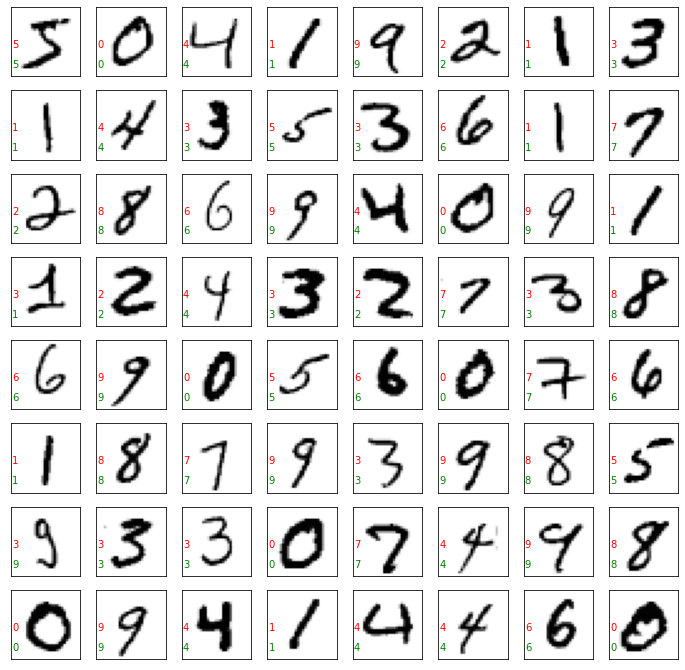

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
for i in range(64):
    plt.subplot(8, 8, i+1, xticks=[], yticks=[])
    plt.imshow(x[i], cmap='Greys')
    plt.text(0, 24, str(y[i]), color='green')
    plt.text(0, 16, str(y_pred[i]), color='red')

In [39]:
x=[-1,0,1.]
tf.nn.softmax(x)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.09003057, 0.24472848, 0.66524094], dtype=float32)>

In [40]:
import numpy as np
np.exp(x)/sum(np.exp(x))

array([0.09003057, 0.24472847, 0.66524096])

## one_hot()

In [41]:
a = [5, 0, 4, 1, 9]
depth = 10
tf.one_hot(a, depth)

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)>

In [42]:
y_true = tf.one_hot(y, 10)
y_true.shape

TensorShape([60000, 10])

In [44]:
a = [1, 0, 0]
a_ = [0.9, 0.05, 0.05]

In [45]:
sum(a*(-np.log(a_)))

0.10536051565782628

In [46]:
tf.keras.losses.categorical_crossentropy(a, a_)

<tf.Tensor: shape=(), dtype=float32, numpy=0.105360545>

In [52]:
tf.reduce_mean(tf.keras.losses.categorical_crossentropy(y_true, y_))

<tf.Tensor: shape=(), dtype=float32, numpy=0.1824641>

In [53]:
sum(y_true*(-np.log(y_)))

<ipython-input-53-99dd79e681d3>:1: RuntimeWarning: divide by zero encountered in log
  sum(y_true*(-np.log(y_)))


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], dtype=float32)>